In [ ]:
from google.colab import files
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_df=pd.read_csv('/content/drive/MyDrive/digit-recognizer/test.csv')

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/digit-recognizer/train.csv')

In [ ]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df.shape

(42000, 785)

In [ ]:
test_df.shape

(28000, 784)

In [ ]:
import tensorflow as tf

# Setup plotting
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [ ]:

X_train= train_df.drop('label', axis=1)
y_train=train_df['label']

#Normalize train and test images
X_train = (X_train.astype(np.float32) - 127.5)/127.5
x_test = (test_df.astype(np.float32) - 127.5)/127.5

In [ ]:
def plot_images(df, n, label):
    for i in range(10):
        random_value = np.random.randint(len(df[label]))
        plt.subplot(n, n, i+1)
        X = df.iloc[random_value, :-1].values.astype("int").reshape(28, 28)
        plt.imshow(X, cmap="binary")
        plt.title(str(df[label][random_value]), color="green", fontsize=28)
        plt.axis("off")
        plt.subplots_adjust(left=1, right=4.5, bottom=.5, top=2.5)
    plt.figure(figsize=(10, 10))
    plt.show()

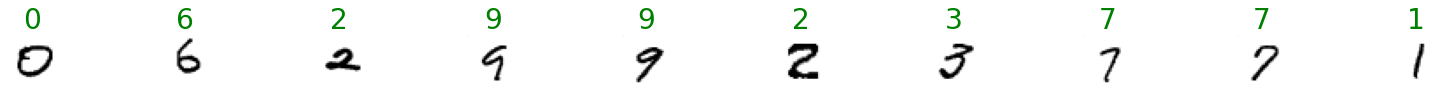

<Figure size 720x720 with 0 Axes>

In [ ]:
plot_images(train_df, 10, 'label')

In [ ]:
train_df['label'].value_counts()


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

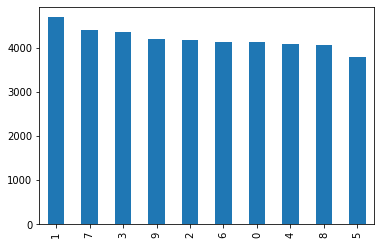

In [ ]:
train_df['label'].value_counts().plot.bar()


In [ ]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (28, 28, 1)

First image:
 [[[-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [ ]:
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape)

Training set: (33600, 784) (33600,)
Test set: (28000, 784)


In [ ]:
y_train = to_categorical(y_train)

In [ ]:
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_1():
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(784,)))
  
  model.add(Dense(32, activation= 'relu'))
  
  model.add(Dense(10, activation='softmax'))
    #Add layers as per the architecture mentioned above in the same sequence
    #declare adam optimizer with learning rate of 0.001 
  optimizer = Adam(learning_rate=0.001)
    
    #compile the model
  model.compile(optimizer= optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    
  return model

In [ ]:
from tensorflow.keras.models import Sequential
# Build the model
model_1 = nn_model_1()

In [ ]:
#Print the summary
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                50240     
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
history_model_1 = model_1.fit(X_train, y_train,validation_split=0.2, epochs=20, batch_size=128, verbose = 1)

Epoch 1/20
210/210 [==============================] - 3s 13ms/step - loss: 0.0613 - accuracy: 0.9802 - val_loss: 0.0588 - val_accuracy: 0.9817
Epoch 2/20
210/210 [==============================] - 2s 10ms/step - loss: 0.0557 - accuracy: 0.9823 - val_loss: 0.0596 - val_accuracy: 0.9798
Epoch 3/20
210/210 [==============================] - 2s 10ms/step - loss: 0.0507 - accuracy: 0.9839 - val_loss: 0.0559 - val_accuracy: 0.9824
Epoch 4/20
210/210 [==============================] - 3s 12ms/step - loss: 0.0482 - accuracy: 0.9841 - val_loss: 0.0609 - val_accuracy: 0.9793
Epoch 5/20
210/210 [==============================] - 3s 12ms/step - loss: 0.0495 - accuracy: 0.9839 - val_loss: 0.0691 - val_accuracy: 0.9786
Epoch 6/20
210/210 [==============================] - 2s 10ms/step - loss: 0.0436 - accuracy: 0.9852 - val_loss: 0.0653 - val_accuracy: 0.9802
Epoch 7/20
210/210 [==============================] - 2s 9ms/step - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.0770 - val_accuracy: 0.9769


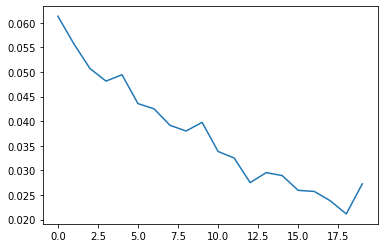

In [ ]:
history_df = pd.DataFrame(history_model_1.history)
# use Pandas native plot method
history_df['loss'].plot();

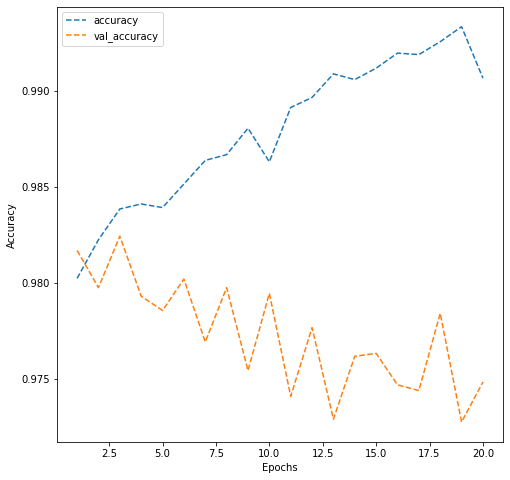

In [ ]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

First, we need to clear the previous model's history from the keras backend. Also, let's fix the seed again after clearing the backend.


In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_2():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(784,)))
    
    model.add(Dense(128, activation= 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(10, activation='softmax'))

    #Add layers as per the architecture mentioned above in the same sequence
    
    #declare adam optimizer with learning rate of 0.0005 
    optimizer = Adam(learning_rate=0.0005)
    
    #compile the model
    model.compile(optimizer= optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
# Build the model
model_2 = nn_model_2()

In [ ]:
#Print the model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)              

In [ ]:
# Fit the model
history_model_2 = model_2.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=128, verbose = 1)

Epoch 1/30
210/210 [==============================] - 3s 11ms/step - loss: 0.9008 - accuracy: 0.7507 - val_loss: 0.4770 - val_accuracy: 0.9092
Epoch 2/30
210/210 [==============================] - 2s 9ms/step - loss: 0.3274 - accuracy: 0.9137 - val_loss: 0.2180 - val_accuracy: 0.9354
Epoch 3/30
210/210 [==============================] - 2s 9ms/step - loss: 0.2349 - accuracy: 0.9341 - val_loss: 0.1586 - val_accuracy: 0.9531
Epoch 4/30
210/210 [==============================] - 2s 8ms/step - loss: 0.1839 - accuracy: 0.9463 - val_loss: 0.1554 - val_accuracy: 0.9525
Epoch 5/30
210/210 [==============================] - 2s 9ms/step - loss: 0.1558 - accuracy: 0.9544 - val_loss: 0.1361 - val_accuracy: 0.9580
Epoch 6/30
210/210 [==============================] - 2s 8ms/step - loss: 0.1404 - accuracy: 0.9574 - val_loss: 0.1324 - val_accuracy: 0.9580
Epoch 7/30
210/210 [==============================] - 2s 8ms/step - loss: 0.1168 - accuracy: 0.9649 - val_loss: 0.1335 - val_accuracy: 0.9601
Epoch

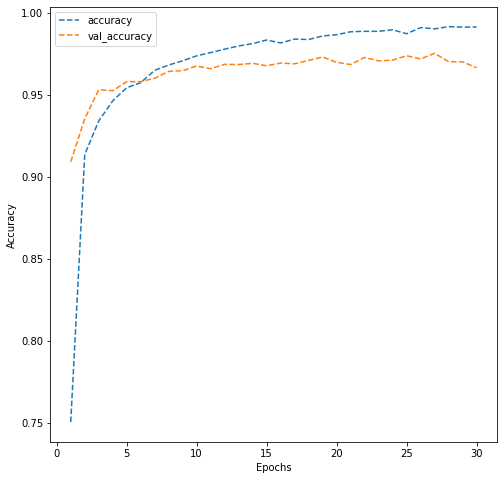

In [ ]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

- The second model with dropout layers seems to have better performance as compared to the previous model.
Both Accuracy and the validation accuracy has improved as compared to the previous model.
- The validation accuracy is closer to the training accuracy. This indicates that the model is giving a better generalized performance.
- 

In [ ]:
pred = model_2.predict(X_test)
pred

array([[2.4166526e-04, 2.6216960e-04, 9.8798221e-01, ..., 5.5055291e-04,
        3.4949163e-03, 5.7927025e-03],
       [9.9967694e-01, 4.4956528e-06, 1.2615779e-05, ..., 5.7723237e-06,
        1.8168697e-05, 9.0415480e-05],
       [2.9437774e-04, 4.3464571e-04, 6.5348682e-04, ..., 3.5363873e-03,
        5.5156615e-02, 9.1256005e-01],
       ...,
       [6.4292917e-06, 3.8838873e-05, 3.5396602e-05, ..., 1.4218313e-04,
        5.1051495e-04, 6.0029689e-04],
       [8.6973916e-05, 2.4167592e-05, 5.9176364e-05, ..., 2.3235462e-04,
        7.4889668e-04, 9.9777550e-01],
       [2.0215542e-03, 1.2077711e-03, 8.3022791e-01, ..., 1.2376005e-03,
        3.6752954e-02, 1.0644083e-01]], dtype=float32)

In [ ]:
pred = np.argmax(pred , axis =1)

In [ ]:
submission=pd.read_csv('/content/drive/MyDrive/digit-recognizer/sample_submission.csv')
submission['Label']=pred
submission.to_csv('prediction1.csv', index=False)